In [1]:
import pandas as pd
import numpy as np
import sqlite3 as db
import matplotlib.pyplot as plt

In [2]:
src = '/Users/anegron/projects/airflow_demo/demo.sqlite'
conn = db.connect(src)

In [3]:
df_lines  = pd.read_sql_query("select * from airlines;", conn)
df_lines = df_lines.replace('\\N', np.nan)

In [4]:
df_ports  = pd.read_sql_query("select * from airports;", conn)
df_ports = df_ports.replace('\\N', np.nan)

In [5]:
df_planes = pd.read_sql_query("select * from airplanes;", conn)
df_planes = df_planes.replace('\\N', np.nan)

In [6]:
df_routes = pd.read_sql_query("select * from routes;", conn)
df_routes = df_routes.replace('\\N', np.nan)

In [7]:
# Active airlines
airlines = df_lines.loc[df_lines['active'] == 'Y', :].drop(columns='active').dropna(subset=['name'])
# Direct flights
routes = df_routes[df_routes['stops'] == 0].dropna(how='any').drop(columns='stops')
routes['source_id'] = routes.source_id.astype(int)
routes['dest_id'] = routes.dest_id.astype(int)
routes['airline_of_id'] = routes.airline_of_id.astype(int)
# airports
airports = df_ports 

In [8]:
df_src = (pd.merge(routes, airports, left_on='source_id', right_on='id', how='inner'))
df_src.columns = df_src.columns.map(lambda x: str(x) + '_s')

df_dst = df_src.merge(airports, left_on='dest_id_s', right_on='id', how='inner')
airlines.columns = airlines.columns.map(lambda x: str(x) + '_a')
dst_air = df_dst.merge(airlines, left_on='airline_of_id_s', right_on='id_a', how='inner')

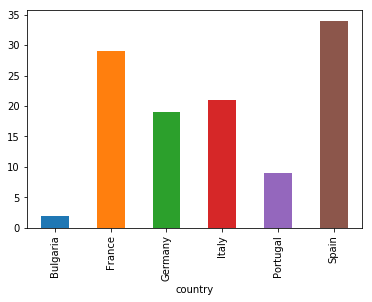

In [18]:

cond = dst_air["country"].isin(["France",'Spain','Italy','Bulgaria','Portugal','Germany'])
dst_air.where(cond).groupby('country')['city'].nunique().plot(kind='bar')
plt.savefig('/Users/anegron/projects/airflow_demo/airports_by_country.png',bbox_inches='tight')
plt.show()


<Figure size 432x288 with 0 Axes>

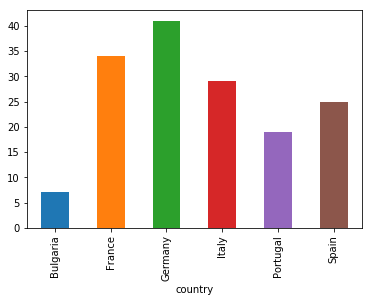

In [19]:
dst_air.where(cond).groupby('country')['airline_s'].nunique().plot(kind='bar')
plt.savefig('/Users/anegron/projects/airflow_demo/airlines_by_country.png',bbox_inches='tight')
plt.show()


<Figure size 432x288 with 0 Axes>